In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datatools as dt

ModuleNotFoundError: No module named 'datatools'

In [3]:
from .pkgs import datatools

ImportError: attempted relative import with no known parent package

In [1]:
import pyarrow as pa
import torch
import torchaudio
import torchvision
import pyspark

In [2]:
file_path=r'/home/ibrahim/Downloads/Mid_data.xlsx'

In [3]:
week1_df=pd.read_excel(file_path,sheet_name='Week-I',header=5)
week3o_df=pd.read_excel(file_path,sheet_name='Week-III-O',header=5)
week3rt_df=pd.read_excel(file_path,sheet_name='Week-III-Retake',header=5)
team_df=pd.read_excel(file_path,sheet_name='Team List')
gjmaster_df=pd.read_excel(file_path,sheet_name='Game Jam - Master',header=2)
gjcomp_df=pd.read_excel(file_path,sheet_name='Game Jam - Component Scores',header=1)

In [4]:
df_master=[week1_df,week3o_df,week3rt_df,team_df,gjmaster_df,gjcomp_df]
for df in df_master:
    col=dt.df_col(df.columns,15)
    df.columns=col
    

In [5]:
week1_df=week1_df.iloc[:,4:]
gjcomp_df=gjcomp_df.iloc[:,2:]
week3rt_df=week3rt_df.iloc[:,:10]

In [6]:
week1_df['erp']=week1_df['erp'].astype(int)
week1_df['erp'].fillna(0,inplace=True)
week1_df.head()

,erp,room,instructor,course,week,presence,score_,column1,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score
0,28369,7424,Wasim,ITC,1,Yes,92.86,NaN,13,14,62.50,10,16,92.86
1,29280,7424,Wasim,ITC,1,Yes,92.86,NaN,13,14,68.75,11,16,92.86
2,29283,7424,Wasim,ITC,1,Yes,92.86,NaN,13,14,68.75,11,16,92.86
3,29052,7425,Jawwad,ITC,1,Yes,91.67,NaN,11,12,-1.00,-1,-1,91.67
4,29282,7424,Wasim,ITC,1,Yes,85.71,NaN,12,14,37.50,6,16,85.71


In [7]:
week1_df.drop(columns='column1',inplace=True)

In [8]:
week1_df['erp'].is_unique

True

In [9]:
gjcomp_df.head()

,team,fun,playability,extensibility,design_/_idea,score_final
0,23,5.000000,5.000000,4.000000,4.500000,10
1,45,4.666667,3.666667,3.000000,4.666667,10
2,32,4.333333,4.333333,4.333333,4.666667,10
3,29,4.333333,4.333333,4.000000,4.666667,10
4,26,4.333333,4.000000,3.666667,4.666667,10


In [10]:
team_df.head()

,team_name,tcn,tcrn,notm,tm1n,tm1rn,tm2n,tm2rn,tm3rn
0,Big decision,Muhammad Sharique Baig,28369,4,Muhammad Abdullah Faraz,29271,Syed Ahmed Farrukh,28543,28410
1,Anarchists,Syed M Abdullah Yousuf,29067,4,Ayesha Kashif Shamim,29155,Ali Hamza,29198,29186
2,Puzzle Pioneers,Kabeer Jaffri,29027,4,Izza Sohail,28996,Fatima Imtiaz,28301,29008
3,Raze,Kashaf Saleem,29175,4,Mahnoor Mughal,29166,Aabeerah Iqbal,29080,29159
4,Delta,Ammar Bin Aamir Khan,29296,4,Luv Kumar Lohano,29016,Syed Muhammad Taha,29208,29299


In [11]:
col=['tcrn','tm1rn','tm2rn','tm3rn']
team_df.drop_duplicates(subset=col,inplace=True)

In [12]:
team_df.columns

Index(['team_name', 'tcn', 'tcrn', 'notm', 'tm1n', 'tm1rn', 'tm2n', 'tm2rn',
       'tm3rn'],
      dtype='object')

In [13]:
uniq={}
for i in col:
    x = team_df[i].is_unique
    uniq.update({i:x})
print(uniq)

{'tcrn': True, 'tm1rn': True, 'tm2rn': True, 'tm3rn': True}


In [14]:
for i in col:
    x=team_df[i].value_counts()
    print(x[x>1])

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [15]:
week3o_df.columns.values[7]='score%'
week3o_df.columns.values[8]='score#'
week3rt_df.columns.values[7]='score%'
week3rt_df.columns.values[8]='score#'

In [16]:
week3o_df['student_id']=week3o_df['student_id'].fillna(0)
week3o_df['student_id']=week3o_df['student_id'].astype(int)
week3o_df.head()

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
0,7425,Jawwad,ITC.W3.VX1,ITC,3,NaN,0,NaN,10,10
1,7425,Jawwad,ITC.W3.VX1,ITC,3,Yes,28187,60,6,10
2,7425,Jawwad,ITC.W3.VX1,ITC,3,Yes,29183,30,3,10
3,7425,Jawwad,ITC.W3.VX1,ITC,3,Yes,29021,40,4,10
4,7425,Jawwad,ITC.W3.VX1,ITC,3,Yes,28998,40,4,10


In [17]:
week3o_df['student_id'].is_unique

False

In [18]:
x=week3o_df['student_id'].value_counts()
x[x>1]

student_id
25273    2
Name: count, dtype: int64

In [19]:
week3o_df[week3o_df['student_id']==25273]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
23,7425,Jawwad,ITC.W3.VX1,ITC,3,Yes,25273,40,4,10
184,7422,Jawwad,ITC.W3.VX2,ITC,3,No,25273,-,-,11


In [20]:
week3o_df.drop(index=184,inplace=True)

In [21]:
week3o_df[week3o_df['student_id']==25273]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
23,7425,Jawwad,ITC.W3.VX1,ITC,3,Yes,25273,40,4,10


In [22]:
week3rt_df['student_id']=week3rt_df['student_id'].fillna(0)

week3rt_df['student_id']=week3rt_df['student_id'].astype(int)
week3rt_df.head()

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
0,NaN,NaN,NaN,ITC,3,NaN,0,NaN,NaN,NaN
1,JAFBACKUP,Jawwad,ITC-W3.VX3,ITC,3,Yes,28988,41.67,5,12.0
2,ITCBACKUPJAF2,Jawwad,ITC-W3.VX3,ITC,3,Yes,27033,25,3,12.0
3,7425,Jawwad,ITC_Retake_W3_V2,ITC,3,Yes,28187,66.67,6,9.0
4,7425,Jawwad,ITC_Retake_W3_V2,ITC,3,Yes,29183,77.78,7,9.0


In [23]:
week3rt_df['student_id'].is_unique

False

In [24]:
x=week3rt_df['student_id'].value_counts()
x[x>1]

student_id
28988    3
29179    2
27033    2
25273    2
29015    2
29224    2
Name: count, dtype: int64

In [25]:
week3rt_df[week3rt_df['student_id']==28988]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
1,JAFBACKUP,Jawwad,ITC-W3.VX3,ITC,3,Yes,28988,41.67,5,12.0
48,7425,Jawwad,ITC_Retake_W3_V2,ITC,3,No,28988,-,-,9.0
197,JAFBACKUP,Jawwad,ITC_Retake_W3_V2,ITC,3,Yes,28988,44.44,4,9.0


In [26]:
week3rt_df[week3rt_df['student_id']==29179]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
188,7424,Waseem,ITC_Retake_W3_V2,ITC,3,Yes,29179,66.67,6,9.0
200,WASIMLATE,Waseem,ITC_Retake_W3_V2,ITC,3,No,29179,-,-,9.0


In [27]:
week3rt_df[week3rt_df['student_id']==27033]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
2,ITCBACKUPJAF2,Jawwad,ITC-W3.VX3,ITC,3,Yes,27033,25,3,12.0
205,ITCBACKUPJAF2,Jawwad,ITC_Retake_W3_V2,ITC,3,Yes,27033,33.33,3,9.0


In [28]:
week3rt_df[week3rt_df['student_id']==25273]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
25,7425,Jawwad,ITC_Retake_W3_V2,ITC,3,No,25273,-,-,9.0
147,7422,Jawwad,ITC_Retake_W3_V2,ITC,3,No,25273,-,-,9.0


In [29]:
week3rt_df[week3rt_df['student_id']==29015]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
118,7423,Waseem,ITC_Retake_W3_V2,ITC,3,Yes,29015,22.22,2,9.0
202,WASIMLATE,Waseem,ITC_Retake_W3_V2,ITC,3,No,29015,-,-,9.0


In [30]:
week3rt_df[week3rt_df['student_id']==29224]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total
183,7424,Waseem,ITC_Retake_W3_V2,ITC,3,Yes,29224,88.89,8,9.0
203,WASIMLATE,Waseem,ITC_Retake_W3_V2,ITC,3,No,29224,-,-,9.0


In [31]:
week3rt_df[week3rt_df['presence']=='No']['presence'].count()

41

In [32]:
week3rt_df.drop(index=[203,1,48,200,2,25,147,202],inplace=True)

In [33]:
con=week3rt_df['variation']=='ITC-W3.VX3'
week3rt_df[con]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total


In [34]:
week3o_df=week3o_df[week3o_df['student_id']!=0]
week3rt_df=week3rt_df[week3rt_df['student_id']!=0]

In [35]:
week3o_df[week3o_df['student_id']==0]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total


In [36]:
week3rt_df[week3rt_df['student_id']==0]

,room,instructor,variation,course,week,presence,student_id,score%,score#,total


In [37]:
print(week1_df['erp'].count())
print(week3o_df['student_id'].count())
print(week3rt_df['student_id'].count())

182
192
197


In [38]:
week1_df.head()

,erp,room,instructor,course,week,presence,score_,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score
0,28369,7424,Wasim,ITC,1,Yes,92.86,13,14,62.50,10,16,92.86
1,29280,7424,Wasim,ITC,1,Yes,92.86,13,14,68.75,11,16,92.86
2,29283,7424,Wasim,ITC,1,Yes,92.86,13,14,68.75,11,16,92.86
3,29052,7425,Jawwad,ITC,1,Yes,91.67,11,12,-1.00,-1,-1,91.67
4,29282,7424,Wasim,ITC,1,Yes,85.71,12,14,37.50,6,16,85.71


In [39]:
quiz_df = pd.merge(week1_df, week3o_df, left_on='erp', right_on='student_id', how='right',suffixes=('_w1','_w3o'))

In [40]:
quiz_df.columns

Index(['erp', 'room_w1', 'instructor_w1', 'course_w1', 'week_w1',
       'presence_w1', 'score_', 'quiz1_score', 'q1tp', 'quiz1_score_2',
       'quiz2_score3', 'qtp', 'quiz2_score', 'room_w3o', 'instructor_w3o',
       'variation', 'course_w3o', 'week_w3o', 'presence_w3o', 'student_id',
       'score%', 'score#', 'total'],
      dtype='object')

In [41]:
len(quiz_df)

192

In [42]:
quiz_df.drop(columns=['erp','room_w1','instructor_w1','course_w1','week_w1',\
                      'presence_w1','room_w3o','variation','week_w3o','presence_w3o'],inplace=True)

In [43]:
quiz_df.head()

,score_,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score,instructor_w3o,course_w3o,student_id,score%,score#,total
0,25.00,3.0,12.0,31.25,5.0,16.0,31.25,Jawwad,ITC,28187,60,6,10
1,75.00,9.0,12.0,50.00,8.0,16.0,75.00,Jawwad,ITC,29183,30,3,10
2,25.00,3.0,12.0,56.25,9.0,16.0,56.25,Jawwad,ITC,29021,40,4,10
3,25.00,3.0,12.0,56.25,9.0,16.0,56.25,Jawwad,ITC,28998,40,4,10
4,41.67,5.0,12.0,43.75,7.0,16.0,43.75,Jawwad,ITC,29017,20,2,10


In [44]:
quiz_df=pd.merge(quiz_df,week3rt_df,left_on='student_id',right_on='student_id',how='outer',suffixes=('_w3','_w3rt'))

In [45]:
quiz_df.columns

Index(['score_', 'quiz1_score', 'q1tp', 'quiz1_score_2', 'quiz2_score3', 'qtp',
       'quiz2_score', 'instructor_w3o', 'course_w3o', 'student_id',
       'score%_w3', 'score#_w3', 'total_w3', 'room', 'instructor', 'variation',
       'course', 'week', 'presence', 'score%_w3rt', 'score#_w3rt',
       'total_w3rt'],
      dtype='object')

In [46]:
quiz_df.drop(columns=['instructor_w3o','course_w3o','variation','week',\
                      'presence'],inplace=True)

In [47]:
len(quiz_df[quiz_df['score_'].isnull()])

17

In [48]:
quiz_df.fillna(0,inplace=True)

In [49]:
quiz_df.replace(-1,0,inplace=True)
quiz_df.replace('-',0,inplace=True)

In [50]:
quiz_df[quiz_df['student_id']==28369]

,score_,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score,student_id,score%_w3,score#_w3,total_w3,room,instructor,course,score%_w3rt,score#_w3rt,total_w3rt
87,92.86,13.0,14.0,62.5,10.0,16.0,92.86,28369,60.0,6,10.0,7424,Waseem,ITC,88.89,8,9.0


In [51]:
quiz_df[quiz_df['score%_w3'].isnull()]

,score_,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score,student_id,score%_w3,score#_w3,total_w3,room,instructor,course,score%_w3rt,score#_w3rt,total_w3rt


In [52]:
quiz_df['score%_final']=quiz_df.apply(lambda row: max(row['score_'],row['quiz1_score_2']\
                             ,row['quiz2_score']),axis=1)
quiz_df['score%_finalw3']=quiz_df.apply(lambda row: max(row['score%_w3'],row['score%_w3rt']),axis=1)

In [53]:
quiz_df['avgscore%_w2']=quiz_df.apply(lambda row: (row['score%_final']+row['score%_finalw3'])/2,axis=1)

In [54]:
quiz_df

,score_,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score,student_id,score%_w3,score#_w3,total_w3,room,instructor,course,score%_w3rt,score#_w3rt,total_w3rt,score%_final,score%_finalw3,avgscore%_w2
0,25.00,3.0,12.0,31.25,5.0,16.0,31.25,28187,60.0,6,10.0,7425,Jawwad,ITC,66.67,6,9.0,31.25,66.67,48.960
1,75.00,9.0,12.0,50.00,8.0,16.0,75.00,29183,30.0,3,10.0,7425,Jawwad,ITC,77.78,7,9.0,75.00,77.78,76.390
2,25.00,3.0,12.0,56.25,9.0,16.0,56.25,29021,40.0,4,10.0,7425,Jawwad,ITC,22.22,2,9.0,56.25,40.00,48.125
3,25.00,3.0,12.0,56.25,9.0,16.0,56.25,28998,40.0,4,10.0,7425,Jawwad,ITC,0.00,0,9.0,56.25,40.00,48.125
4,41.67,5.0,12.0,43.75,7.0,16.0,43.75,29017,20.0,2,10.0,7425,Jawwad,ITC,66.67,6,9.0,43.75,66.67,55.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.00,0.0,0.0,0.00,0.0,0.0,0.00,19370,0.0,0,0.0,WASIMLATE,Waseem,ITC,0.00,0,9.0,0.00,0.00,0.000
194,0.00,0.0,0.0,0.00,0.0,0.0,0.00,29087,0.0,0,0.0,WASIMLATE,Waseem,ITC,77.78,7,9.0,0.00,77.78,38.890
195,0.00,0.0,0.0,0.00,0.0,0.0,0.00,28096,0.0,0,0.0,WASIMLATE,Waseem,ITC,0.00,0,9.0,0.00,0.00,0.000
196,0.00,0.0,0.0,0.00,0.0,0.0,0.00,29159,0.0,0,0.0,WASIMLATE,Waseem,ITC,55.56,5,9.0,0.00,55.56,27.780


In [55]:
len(quiz_df)

198

In [56]:
quiz_df[quiz_df['student_id']==0]

,score_,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score,student_id,score%_w3,score#_w3,total_w3,room,instructor,course,score%_w3rt,score#_w3rt,total_w3rt,score%_final,score%_finalw3,avgscore%_w2


In [57]:
count=0
count1=0
erp=list(week1_df['erp'])
std_id=list(week3o_df['student_id'])
for x in erp:
    if (quiz_df['student_id']==x).any()==False:
        count+=1
for x in std_id:
    if (quiz_df['student_id']==x).any()==False:
        count1+=1
        print(x)
print(count,count1)

0 0


In [58]:
team_df.iloc[10,:]

team_name                Suiiiii
tcn          Mustansir Muhammad 
tcrn                       29177
notm                           4
tm1n          Ramis Riaz Kamlani
tm1rn                      29071
tm2n         Agha Mohsin Hussain
tm2rn                      29070
tm3rn                      29057
Name: 10, dtype: object

In [59]:
team_df.iloc[10]

team_name                Suiiiii
tcn          Mustansir Muhammad 
tcrn                       29177
notm                           4
tm1n          Ramis Riaz Kamlani
tm1rn                      29071
tm2n         Agha Mohsin Hussain
tm2rn                      29070
tm3rn                      29057
Name: 10, dtype: object

In [60]:
team_df.iloc[19]

team_name              Gamers Guild
tcn                  Muhammad Ramz 
tcrn                          28423
notm                              4
tm1n                  Yaman Sabtain
tm1rn                         28911
tm2n         Muhammad Shaheer Ahmed
tm2rn                         28331
tm3rn                         28903
Name: 20, dtype: object

In [61]:
team_df.iloc[10]

team_name                Suiiiii
tcn          Mustansir Muhammad 
tcrn                       29177
notm                           4
tm1n          Ramis Riaz Kamlani
tm1rn                      29071
tm2n         Agha Mohsin Hussain
tm2rn                      29070
tm3rn                      29057
Name: 10, dtype: object

In [62]:
team_df.drop_duplicates(inplace=True,)

In [63]:
team_df['team_no']=team_df.index+1

In [64]:
team_df[team_df['team_name']=='Checkm8']

,team_name,tcn,tcrn,notm,tm1n,tm1rn,tm2n,tm2rn,tm3rn,team_no
15,Checkm8,Ayesha Salahuddin,29157,4,Afhaam Altaf,29056,Talha Mudassar,29195,27799,16


In [65]:
team_df.drop(columns=['tcn','tm1n','tm2n','notm'],inplace=True)

In [66]:
team_df.drop(columns='team_name',inplace=True)

In [67]:
team_df.head()

,tcrn,tm1rn,tm2rn,tm3rn,team_no
0,28369,29271,28543,28410,1
1,29067,29155,29198,29186,2
2,29027,28996,28301,29008,3
3,29175,29166,29080,29159,4
4,29296,29016,29208,29299,5


In [68]:
conc_df=pd.concat([team_df[['tcrn','team_no']],team_df[['tm1rn','team_no']],\
                   team_df[['tm2rn','team_no']],team_df[['tm3rn','team_no']]],ignore_index=True)

In [69]:
df2=pd.concat([conc_df['tcrn'],conc_df['tm1rn'],conc_df['tm2rn'],conc_df['tm3rn']],axis=0)

In [70]:
total=len(team_df['tcrn'])+len(team_df['tm1rn'])+len(team_df['tm2rn'])+len(team_df['tm3rn'])
print(total)

184


In [71]:
df2.dropna(inplace=True)

In [72]:
len(df2)

184

In [73]:
conc_df['erp']=df2

In [74]:
conc_df.drop(columns=['tcrn','tm1rn','tm2rn','tm3rn'],inplace=True,axis=1)

In [75]:
conc_df.sort_values(ascending=True,inplace=True,by='team_no')

In [76]:
conc_df['erp']=conc_df['erp'].astype(int)

In [77]:
x=conc_df['erp'].value_counts()
x[x>1]

erp
29047    2
Name: count, dtype: int64

In [78]:
conc_df.at[67,'erp']=28314

In [79]:
conc_df[conc_df['erp']==28314]

,team_no,erp
67,23,28314


In [80]:
len(conc_df)

184

In [81]:
conc_df[conc_df['erp']==29231]

,team_no,erp
32,34,29231


In [82]:
gj_df=pd.merge(gjcomp_df,conc_df,left_on='team',right_on='team_no',how='left')

In [83]:
gj_df['erp'].drop_duplicates(inplace=True)

In [84]:
len(gj_df)

186

In [85]:
quiz_df.head()

,score_,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score,student_id,score%_w3,score#_w3,total_w3,room,instructor,course,score%_w3rt,score#_w3rt,total_w3rt,score%_final,score%_finalw3,avgscore%_w2
0,25.00,3.0,12.0,31.25,5.0,16.0,31.25,28187,60.0,6,10.0,7425,Jawwad,ITC,66.67,6,9.0,31.25,66.67,48.960
1,75.00,9.0,12.0,50.00,8.0,16.0,75.00,29183,30.0,3,10.0,7425,Jawwad,ITC,77.78,7,9.0,75.00,77.78,76.390
2,25.00,3.0,12.0,56.25,9.0,16.0,56.25,29021,40.0,4,10.0,7425,Jawwad,ITC,22.22,2,9.0,56.25,40.00,48.125
3,25.00,3.0,12.0,56.25,9.0,16.0,56.25,28998,40.0,4,10.0,7425,Jawwad,ITC,0.00,0,9.0,56.25,40.00,48.125
4,41.67,5.0,12.0,43.75,7.0,16.0,43.75,29017,20.0,2,10.0,7425,Jawwad,ITC,66.67,6,9.0,43.75,66.67,55.210


In [86]:
gj_df[gj_df['erp'].isnull()]

,team,fun,playability,extensibility,design_/_idea,score_final,team_no,erp
84,19,3.5,3.750000,4.000000,3.25,9,NaN,NaN
105,48,3.0,3.333333,3.333333,4.00,4,NaN,NaN


In [87]:
gj_df.drop(index=[84,105],inplace=True,axis=0)

In [88]:
gj_df[gj_df['erp'].isnull()]

,team,fun,playability,extensibility,design_/_idea,score_final,team_no,erp


In [89]:
master_df=pd.merge(quiz_df,gj_df,left_on='student_id',right_on='erp',how='left')

In [90]:
master_df.head()

,score_,quiz1_score,q1tp,quiz1_score_2,quiz2_score3,qtp,quiz2_score,student_id,score%_w3,score#_w3,...,score%_finalw3,avgscore%_w2,team,fun,playability,extensibility,design_/_idea,score_final,team_no,erp
0,25.00,3.0,12.0,31.25,5.0,16.0,31.25,28187,60.0,6,...,66.67,48.960,31.0,2.000000,2.250000,2.000000,2.500000,4.0,31.0,28187.0
1,75.00,9.0,12.0,50.00,8.0,16.0,75.00,29183,30.0,3,...,77.78,76.390,32.0,4.333333,4.333333,4.333333,4.666667,10.0,32.0,29183.0
2,25.00,3.0,12.0,56.25,9.0,16.0,56.25,29021,40.0,4,...,40.00,48.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.00,3.0,12.0,56.25,9.0,16.0,56.25,28998,40.0,4,...,40.00,48.125,20.0,3.666667,3.666667,3.666667,2.666667,6.0,20.0,28998.0
4,41.67,5.0,12.0,43.75,7.0,16.0,43.75,29017,20.0,2,...,66.67,55.210,6.0,4.000000,3.750000,3.250000,3.750000,10.0,6.0,29017.0


In [91]:
master_df.columns

Index(['score_', 'quiz1_score', 'q1tp', 'quiz1_score_2', 'quiz2_score3', 'qtp',
       'quiz2_score', 'student_id', 'score%_w3', 'score#_w3', 'total_w3',
       'room', 'instructor', 'course', 'score%_w3rt', 'score#_w3rt',
       'total_w3rt', 'score%_final', 'score%_finalw3', 'avgscore%_w2', 'team',
       'fun', 'playability', 'extensibility', 'design_/_idea', 'score_final',
       'team_no', 'erp'],
      dtype='object')

In [92]:
master_df.drop(inplace=True,columns=['team','fun','erp','playability','extensibility',\
                                    'design_/_idea','team_no','total_w3','total_w3rt','qtp',\
                                    'q1tp','quiz1_score','quiz2_score3','score#_w3','score#_w3rt',\
                                    'score%_final','score%_finalw3','avgscore%_w2'])

In [93]:
master_df

,score_,quiz1_score_2,quiz2_score,student_id,score%_w3,room,instructor,course,score%_w3rt,score_final
0,25.00,31.25,31.25,28187,60.0,7425,Jawwad,ITC,66.67,4.0
1,75.00,50.00,75.00,29183,30.0,7425,Jawwad,ITC,77.78,10.0
2,25.00,56.25,56.25,29021,40.0,7425,Jawwad,ITC,22.22,NaN
3,25.00,56.25,56.25,28998,40.0,7425,Jawwad,ITC,0.00,6.0
4,41.67,43.75,43.75,29017,20.0,7425,Jawwad,ITC,66.67,10.0
...,...,...,...,...,...,...,...,...,...,...
193,0.00,0.00,0.00,19370,0.0,WASIMLATE,Waseem,ITC,0.00,NaN
194,0.00,0.00,0.00,29087,0.0,WASIMLATE,Waseem,ITC,77.78,NaN
195,0.00,0.00,0.00,28096,0.0,WASIMLATE,Waseem,ITC,0.00,NaN
196,0.00,0.00,0.00,29159,0.0,WASIMLATE,Waseem,ITC,55.56,8.0


In [94]:
order=['course','instructor','room','student_id','score_','quiz2_score','score%_w3','quiz1_score_2','score%_w3rt',\
      'score_final']

In [95]:
master_df=master_df[order].copy()

In [96]:
master_df['quiz'] = master_df.apply(lambda row: (max(row['score_'], row['quiz1_score_2']) + max(row['score%_w3'], row['score%_w3rt'])) / 5, axis=1)

In [97]:
master_df['score_final'].fillna(0,inplace=True)

In [98]:
master_df['total']=master_df.apply(lambda row: row['score_final']+row['quiz'],axis=1)

In [99]:
master_df

,course,instructor,room,student_id,score_,quiz2_score,score%_w3,quiz1_score_2,score%_w3rt,score_final,quiz,total
0,ITC,Jawwad,7425,28187,25.00,31.25,60.0,31.25,66.67,4.0,19.584,23.584
1,ITC,Jawwad,7425,29183,75.00,75.00,30.0,50.00,77.78,10.0,30.556,40.556
2,ITC,Jawwad,7425,29021,25.00,56.25,40.0,56.25,22.22,0.0,19.250,19.250
3,ITC,Jawwad,7425,28998,25.00,56.25,40.0,56.25,0.00,6.0,19.250,25.250
4,ITC,Jawwad,7425,29017,41.67,43.75,20.0,43.75,66.67,10.0,22.084,32.084
...,...,...,...,...,...,...,...,...,...,...,...,...
193,ITC,Waseem,WASIMLATE,19370,0.00,0.00,0.0,0.00,0.00,0.0,0.000,0.000
194,ITC,Waseem,WASIMLATE,29087,0.00,0.00,0.0,0.00,77.78,0.0,15.556,15.556
195,ITC,Waseem,WASIMLATE,28096,0.00,0.00,0.0,0.00,0.00,0.0,0.000,0.000
196,ITC,Waseem,WASIMLATE,29159,0.00,0.00,0.0,0.00,55.56,8.0,11.112,19.112


In [100]:
col=['course','instructor','room','erp','quiz1_o','quiz2_o','quiz3_o',\
     'quiz1_rt','quiz3_rt','gamejam','quizzes','total']
master_df.columns=col

In [101]:
master_df['best_w1']=master_df.apply(lambda row: max(row['quiz1_o'],row['quiz1_rt']),axis=1)

In [102]:
master_df['best_w3']=master_df.apply(lambda row: max(row['quiz3_o'],row['quiz3_rt']),axis=1)

In [103]:
master_df['quiz_w2']=master_df.apply(lambda row: row['best_w1']+row['best_w3']/2,axis=1)

In [104]:
master_df['policy_a']=master_df.apply(lambda row: ((row['best_w1']+row['best_w3'])/2)*0.4,axis=1)

In [105]:
master_df['policy_b']=master_df.apply(lambda row: max(row['best_w1'],row['best_w3'])*0.4,axis=1)

In [106]:
master_df['normalized scores']=((master_df['total'] - master_df['total'].mean())\
                                / master_df['total'].std())*40/ master_df['total'].std()
master_df['policy_a']=master_df['normalized scores']+master_df['policy_a']
master_df['policy_b']=master_df['normalized scores']+master_df['policy_b']

In [107]:
master_df['policy_a']=master_df['gamejam']+master_df['policy_a']
master_df['policy_b']=master_df['gamejam']+master_df['policy_b']

In [108]:
master_df.head()

,course,instructor,room,erp,quiz1_o,quiz2_o,quiz3_o,quiz1_rt,quiz3_rt,gamejam,quizzes,total,best_w1,best_w3,quiz_w2,policy_a,policy_b,normalized scores
0,ITC,Jawwad,7425,28187,25.00,31.25,60.0,31.25,66.67,4.0,19.584,23.584,31.25,66.67,64.585,22.086050,29.170050,-1.497950
1,ITC,Jawwad,7425,29183,75.00,75.00,30.0,50.00,77.78,10.0,30.556,40.556,75.00,77.78,113.890,46.727498,47.283498,6.171498
2,ITC,Jawwad,7425,29021,25.00,56.25,40.0,56.25,22.22,0.0,19.250,19.250,56.25,40.00,76.250,15.793566,19.043566,-3.456434
3,ITC,Jawwad,7425,28998,25.00,56.25,40.0,56.25,0.00,6.0,19.250,25.250,56.25,40.00,76.250,24.504896,27.754896,-0.745104
4,ITC,Jawwad,7425,29017,41.67,43.75,20.0,43.75,66.67,10.0,22.084,32.084,43.75,66.67,77.085,34.427100,39.011100,2.343100


In [109]:
master_df['scale_a']=master_df['policy_a']*0.06

In [110]:
master_df['scale_b']=master_df['policy_b']*0.06

In [111]:
master_df.describe()

,erp,quiz1_o,quiz2_o,quiz3_o,quiz1_rt,quiz3_rt,gamejam,quizzes,total,best_w1,best_w3,quiz_w2,policy_a,policy_b,normalized scores,scale_a,scale_b
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,1.980000e+02,198.000000,198.000000
mean,28683.318182,39.233990,47.600960,35.681667,34.872273,49.776414,5.974747,20.924121,26.898869,47.600960,57.019646,76.110783,26.898869,31.406586,-5.382900e-16,1.613932,1.884395
std,1433.455778,24.430266,22.195165,19.153664,22.713730,30.449972,3.228108,7.666528,9.408371,22.195165,24.359585,28.855864,13.659904,14.123012,4.251533e+00,0.819594,0.847381
min,15110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.155284,-12.155284,-1.215528e+01,-0.729317,-0.729317
25%,28983.500000,25.000000,36.360000,21.250000,18.750000,33.330000,4.000000,18.254000,23.346500,36.360000,44.440000,63.490000,21.741226,25.867388,-1.605274e+00,1.304474,1.552043
50%,29070.500000,41.670000,50.000000,36.360000,37.500000,55.560000,6.000000,22.011000,27.928000,50.000000,60.000000,80.152500,28.393052,32.810715,4.650524e-01,1.703583,1.968643
75%,29218.500000,57.140000,63.640000,50.000000,50.000000,77.780000,10.000000,25.984000,33.210000,63.640000,77.780000,94.445000,36.061926,40.192543,2.851926e+00,2.163716,2.411553
max,29303.000000,92.860000,92.860000,80.000000,81.820000,100.000000,10.000000,36.350000,44.286000,92.860000,100.000000,137.305000,52.143041,57.857041,7.857041e+00,3.128582,3.471422


/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

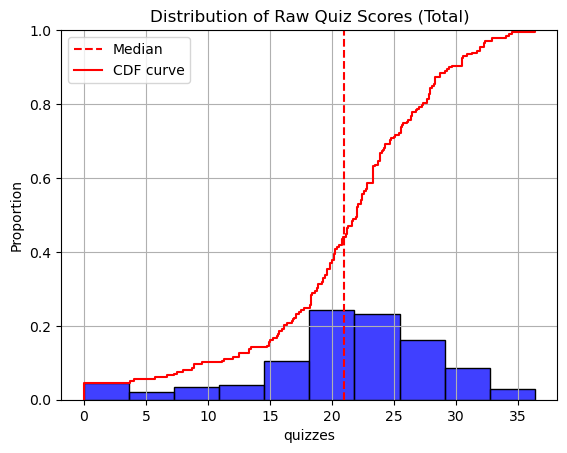

In [112]:
sns.histplot(master_df['quizzes'],bins=10,color='b',stat='proportion')
plt.axvline(master_df['quizzes'].mean(),linestyle='--',color='red',label='Median')
sns.ecdfplot(master_df['quizzes'],color='r',stat='proportion',label='CDF curve')
plt.title('Distribution of Raw Quiz Scores (Total)')
plt.grid(True)
plt.legend()

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

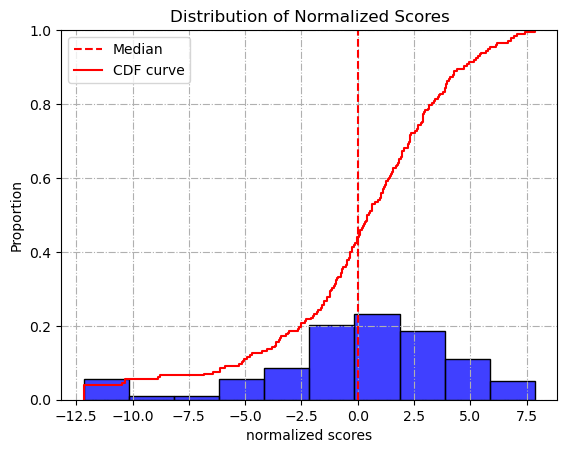

In [113]:
sns.histplot(master_df['normalized scores'],bins=10,color='b',stat='proportion')
plt.axvline(master_df['normalized scores'].mean(),linestyle='--',color='red',label='Median')
sns.ecdfplot(master_df['normalized scores'],color='r',stat='proportion',label='CDF curve')
plt.title('Distribution of Normalized Scores')
plt.grid(linestyle='-.')
plt.legend()

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

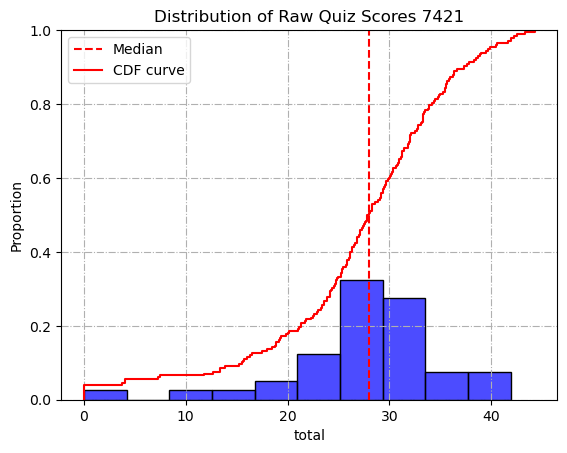

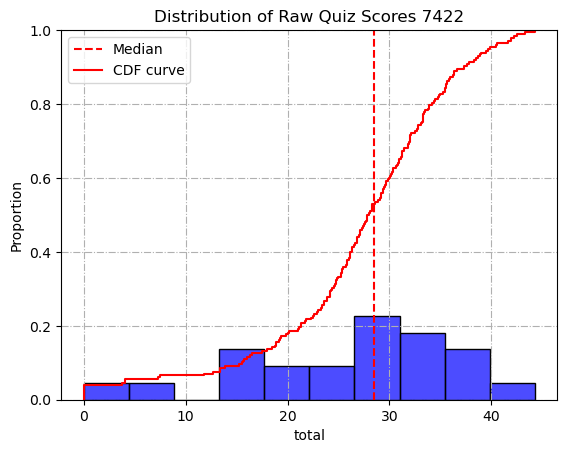

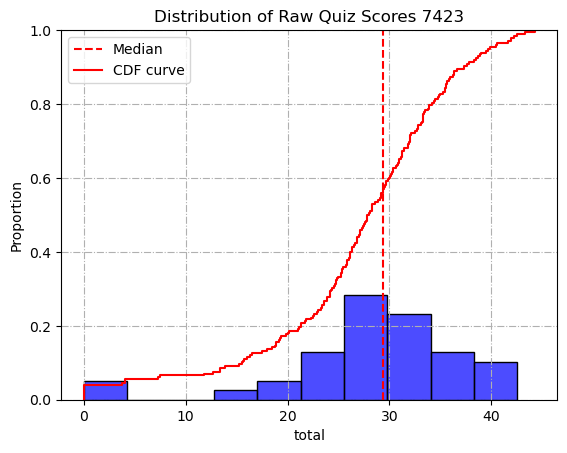

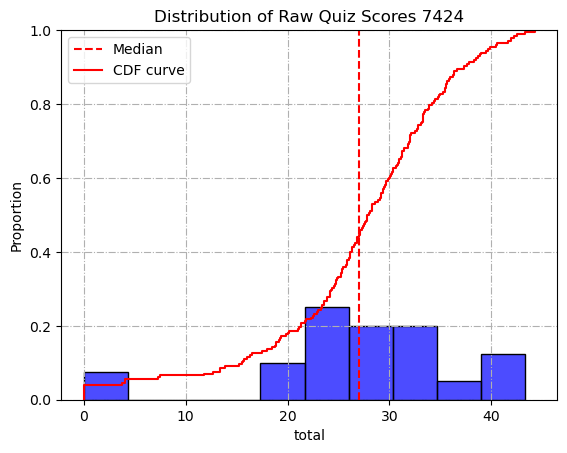

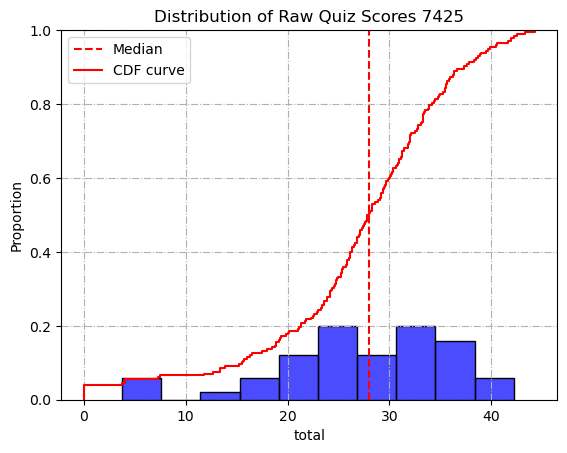

In [114]:
for i in range(7421,7426):
    ax=plt.subplots()
    ax=sns.histplot(master_df[master_df['room']==i]['total'],bins=10,color='b',alpha=0.7,stat='proportion')
    ax=plt.axvline(master_df[master_df['room']==i]['total'].median(),linestyle='--',color='red',label='Median')
    ax=sns.ecdfplot(master_df['total'],color='r',stat='proportion',label='CDF curve')
    ax=plt.title('Distribution of Raw Quiz Scores '+str(i))
    plt.grid(True,linestyle='-.')
    plt.legend()

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Total Quiz Scores by Room')

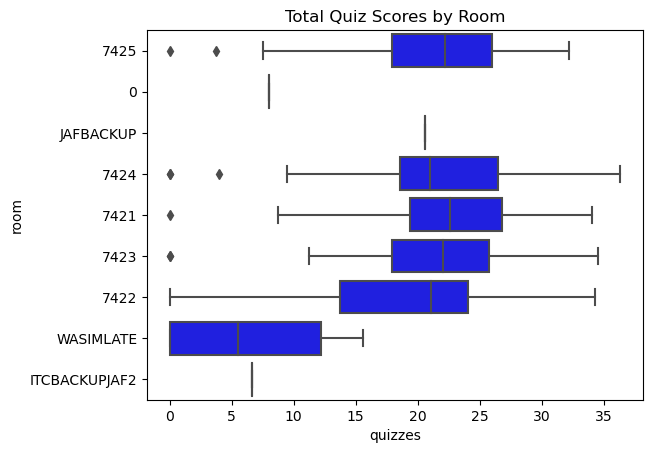

In [115]:
sns.boxplot(data=master_df,x='quizzes',y='room',color='b')
plt.title('Total Quiz Scores by Room')

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'GameJam Scores by Room')

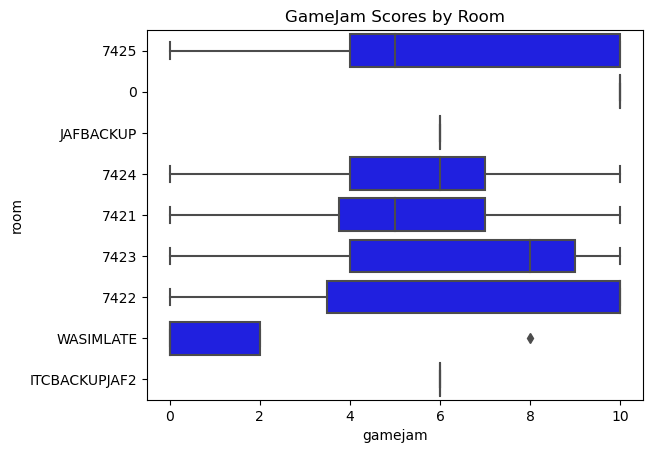

In [116]:
sns.boxplot(data=master_df,x='gamejam',y='room',color='b')
plt.title('GameJam Scores by Room')

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Policy A Scores by Room')

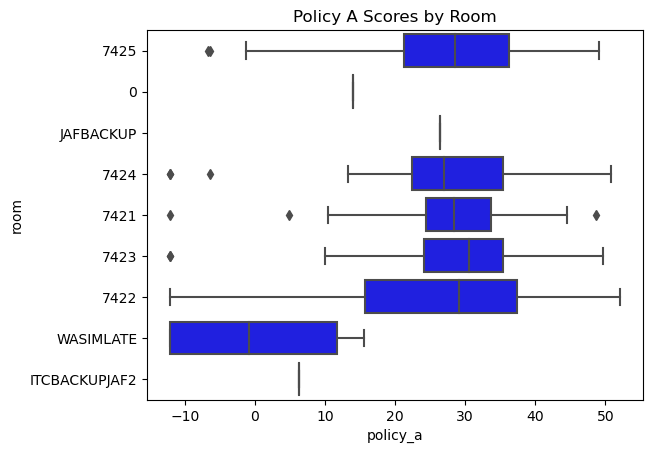

In [117]:
sns.boxplot(data=master_df,x='policy_a',y='room',color='b')
plt.title('Policy A Scores by Room')

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Policy B Scores by Room')

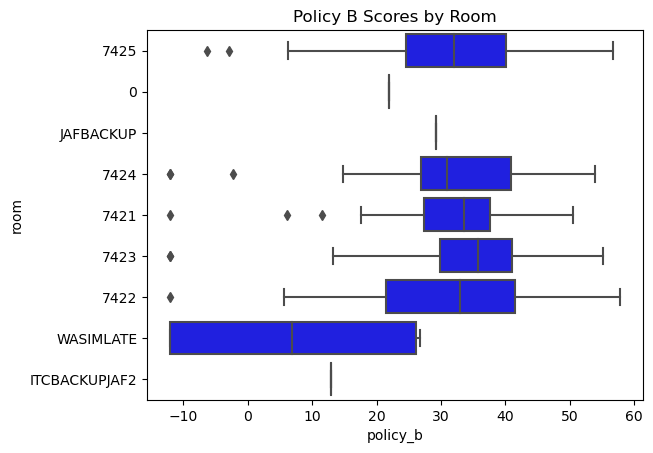

In [118]:
sns.boxplot(data=master_df,x='policy_b',y='room',color='b')
plt.title('Policy B Scores by Room')

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

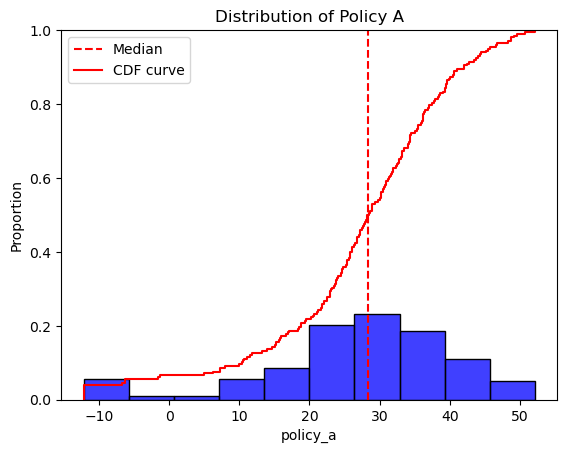

In [119]:
sns.histplot(master_df['policy_a'],bins=10,color='b',stat='proportion')
plt.axvline(master_df['policy_a'].median(),linestyle='--',color='red',label='Median')
sns.ecdfplot(master_df['policy_a'],color='r',stat='proportion',label='CDF curve')
plt.title('Distribution of Policy A')
plt.legend()

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

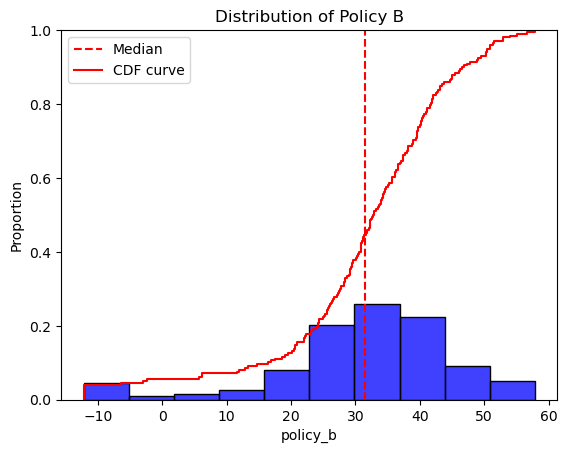

In [120]:
sns.histplot(master_df['policy_b'],bins=10,color='b',stat='proportion')
plt.axvline(master_df['policy_b'].mean(),linestyle='--',color='red',label='Median')
sns.ecdfplot(master_df['policy_b'],color='r',stat='proportion',label='CDF curve')
plt.title('Distribution of Policy B')
plt.legend()

In [121]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X=np.array(master_df['policy_b']).reshape(-1,1)
Y=np.array(master_df['policy_a']).reshape(-1,1)
model.fit(X,Y)
y_val=model.predict(X)

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Policy A vs Policy B')

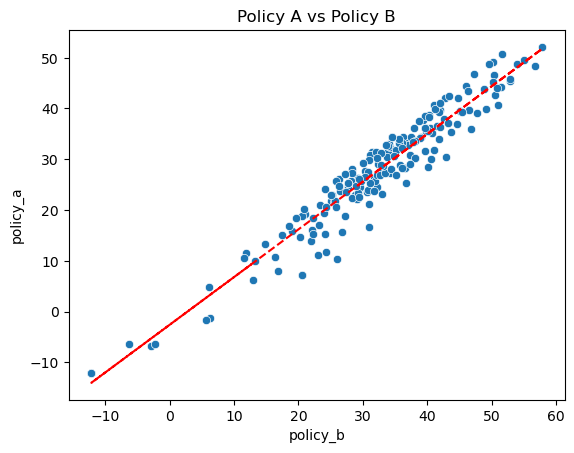

In [122]:
sns.scatterplot(data=master_df,x='policy_b',y='policy_a')
plt.plot(X,y_val,linestyle='--',color='r')
plt.title('Policy A vs Policy B')

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Raw Quiz Score vs Game Jame Score')

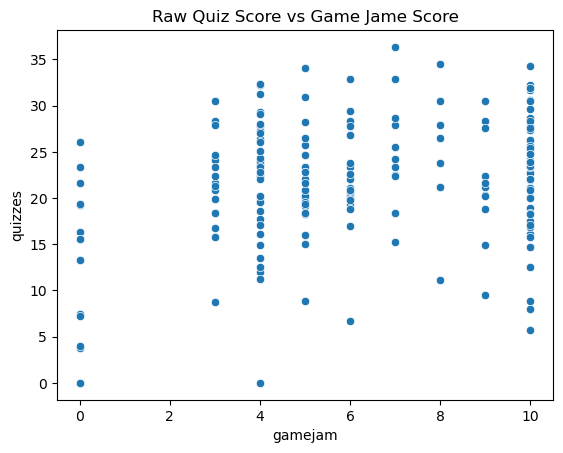

In [123]:
sns.scatterplot(data=master_df,x='gamejam',y='quizzes')
plt.title('Raw Quiz Score vs Game Jame Score')

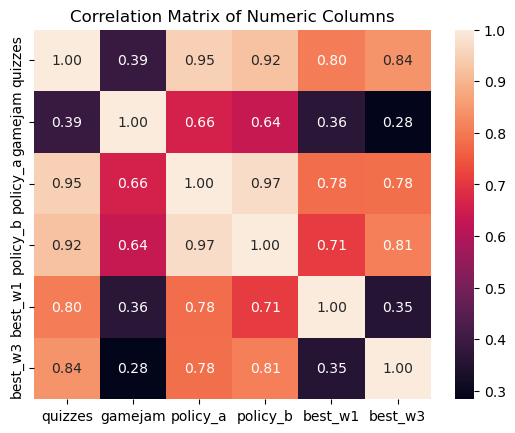

In [124]:
dt.corr_mat(master_df[['quizzes','gamejam','policy_a','policy_b','best_w1','best_w3']])

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

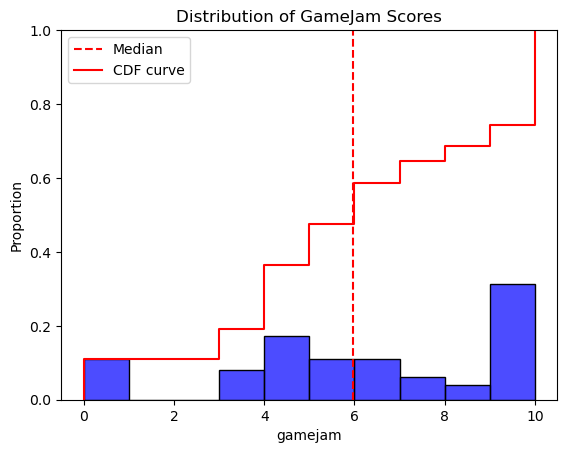

In [125]:
sns.histplot(master_df['gamejam'],bins=10,color='b',alpha=0.7,stat='proportion')
plt.axvline(master_df['gamejam'].mean(),linestyle='--',color='red',label='Median')
sns.ecdfplot(master_df['gamejam'],color='r',stat='proportion',label='CDF curve')
plt.title('Distribution of GameJam Scores')
plt.legend()

In [126]:
master_df['room'].unique()

array([7425, 0, 'JAFBACKUP', 7424, 7421, 7423, 7422, 'WASIMLATE',
       'ITCBACKUPJAF2'], dtype=object)

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

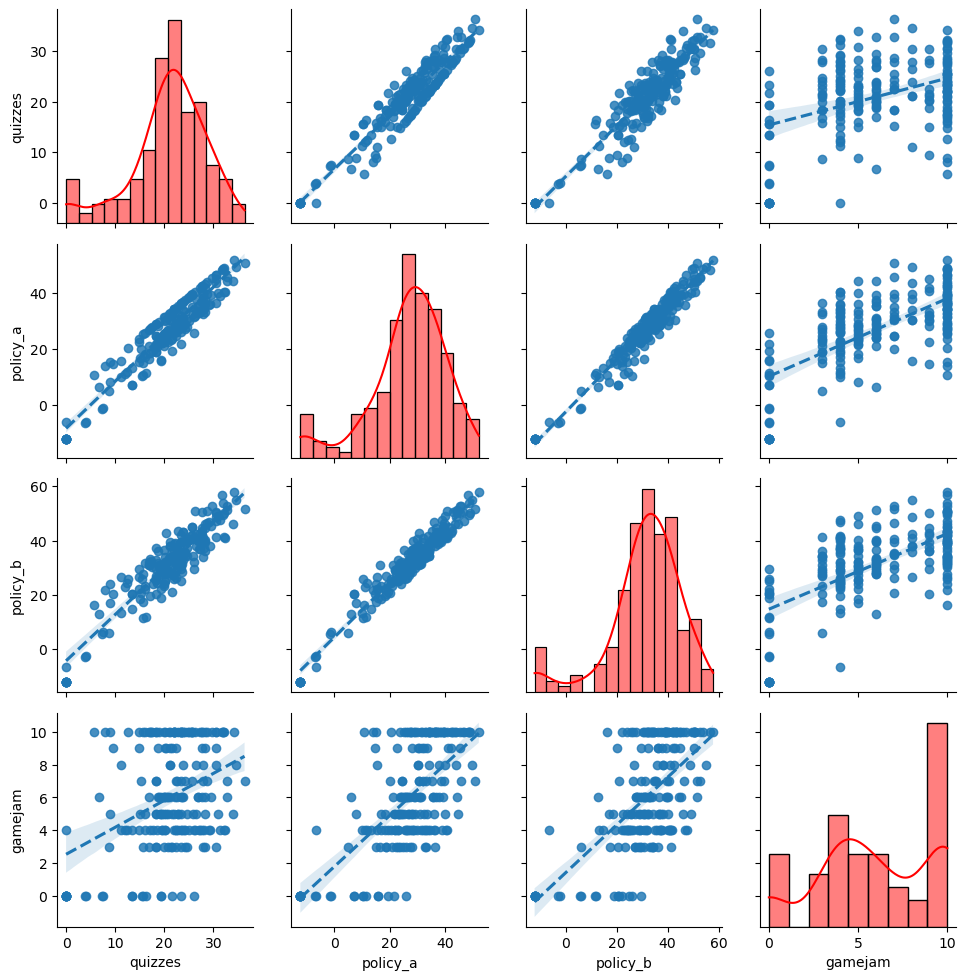

In [127]:
g=sns.PairGrid(master_df[['quizzes','policy_a','policy_b','gamejam']],diag_sharey=False)
g.map_offdiag(sns.scatterplot,alpha=0.1)
g.map_offdiag(sns.regplot,line_kws={'linestyle':'--'})
g.map_diag(sns.histplot,kde=True,color='r')

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

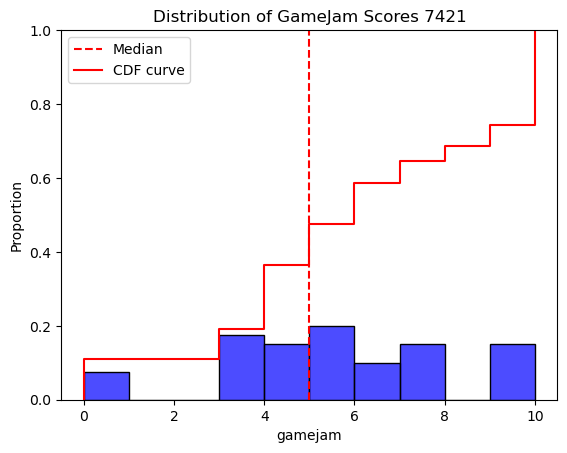

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

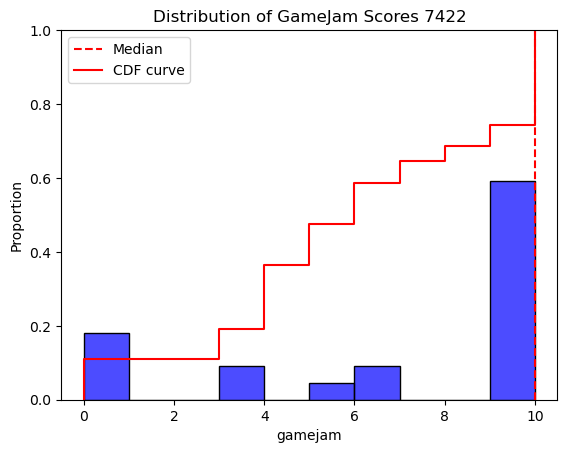

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

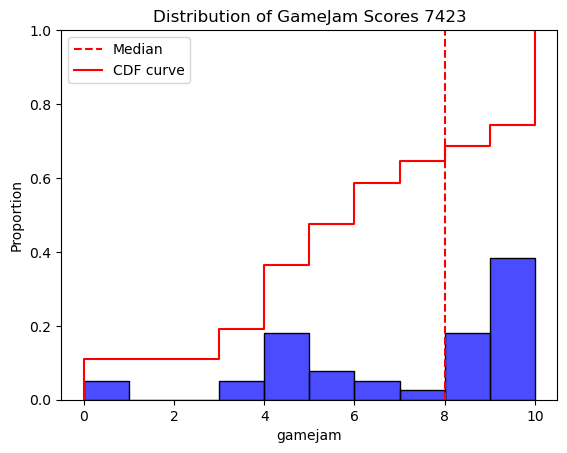

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

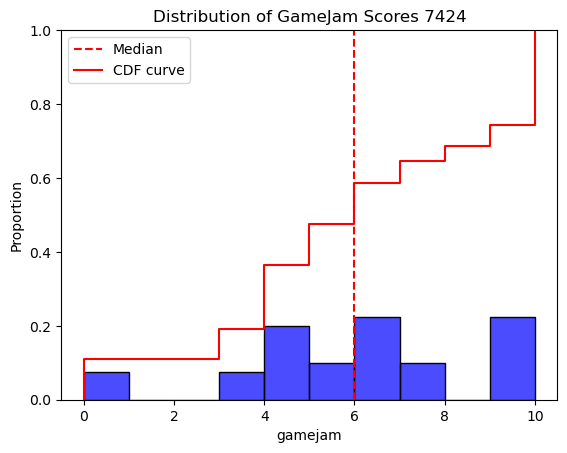

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

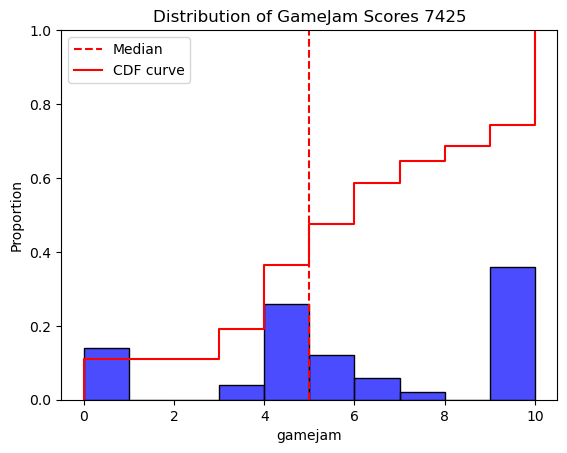

In [128]:
for i in range(7421,7426):
    ax=plt.subplots()
    ax=sns.histplot(master_df[master_df['room']==i]['gamejam'],bins=10,color='b',alpha=0.7,stat='proportion')
    ax=plt.axvline(master_df[master_df['room']==i]['gamejam'].median(),linestyle='--',color='red',label=f'Median')
    ax=sns.ecdfplot(master_df['gamejam'],color='r',stat='proportion',label='CDF curve')
    ax=plt.title('Distribution of GameJam Scores '+str(i))
    plt.legend()
    plt.show()

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

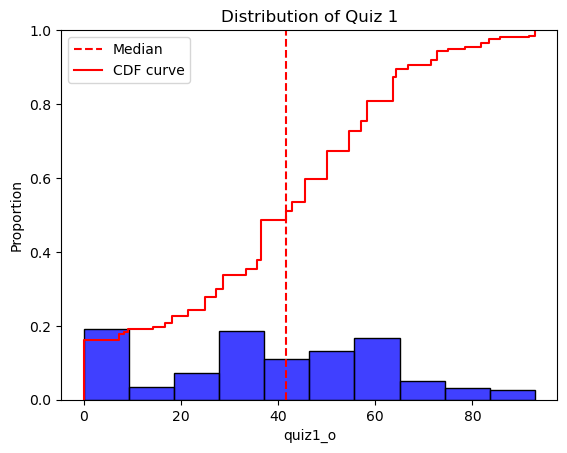

In [129]:
sns.histplot(master_df['quiz1_o'],bins=10,color='b',stat='proportion')
plt.axvline(master_df['quiz1_o'].median(),linestyle='--',color='red',label='Median')
sns.ecdfplot(master_df['quiz1_o'],color='r',stat='proportion',label='CDF curve')
plt.title('Distribution of Quiz 1')
plt.legend()

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

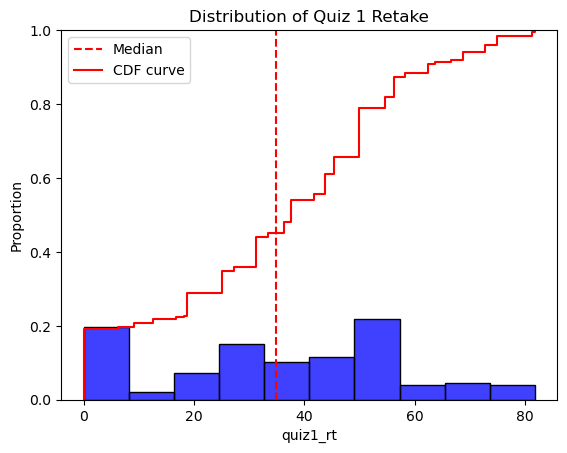

In [130]:
sns.histplot(master_df['quiz1_rt'],bins=10,color='b',stat='proportion')
plt.axvline(master_df['quiz1_rt'].mean(),linestyle='--',color='red',label='Median')
sns.ecdfplot(master_df['quiz1_rt'],color='r',stat='proportion',label='CDF curve')
plt.title('Distribution of Quiz 1 Retake')
plt.legend()

In [131]:
eda=pd.DataFrame({})

In [132]:
eda['quiz1_gr']=(master_df['quiz1_rt']-master_df['quiz1_o'])/master_df['quiz1_o']
eda['quiz3_gr']=(master_df['quiz3_rt']-master_df['quiz3_o'])/master_df['quiz3_o']

In [133]:
eda['week_gr']=(master_df['best_w3']-master_df['best_w1'])/master_df['best_w1']

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

Text(0.5, 1.0, 'Quiz 1 Growth Rate')

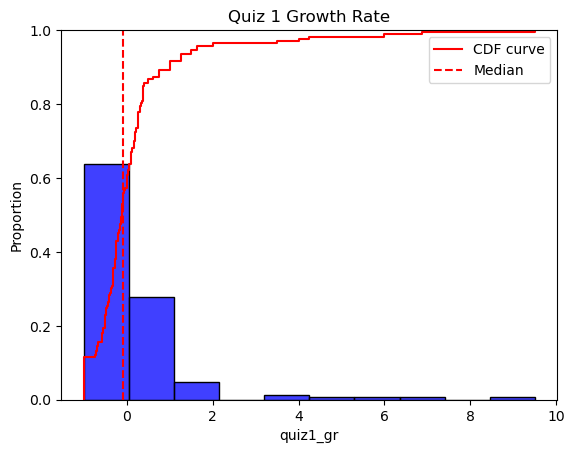

In [134]:
sns.histplot(eda['quiz1_gr'],bins=10,color='b',stat='proportion')
sns.ecdfplot(eda['quiz1_gr'],stat='proportion',color='r',label='CDF curve')
plt.axvline(eda['quiz1_gr'].median(),linestyle='--',color='r',label='Median')
plt.legend()
plt.title('Quiz 1 Growth Rate')

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

Text(0.5, 1.0, 'Quiz 3 Growth Rate')

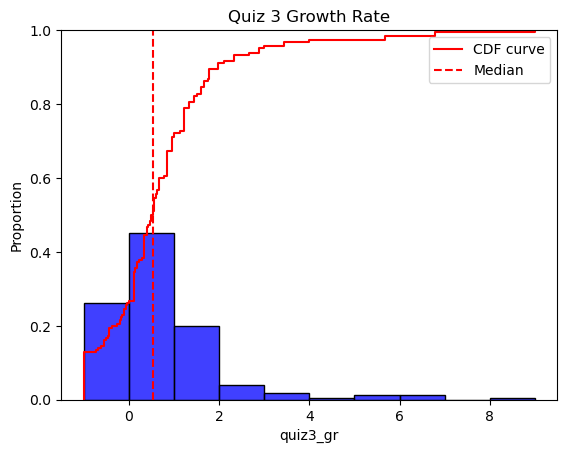

In [135]:
sns.histplot(eda['quiz3_gr'],bins=10,color='b',stat='proportion')
sns.ecdfplot(eda['quiz3_gr'],stat='proportion',color='r',label='CDF curve')
plt.axvline(eda['quiz3_gr'].median(),linestyle='--',color='r',label='Median')
plt.legend()
plt.title('Quiz 3 Growth Rate')

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

Text(0.5, 1.0, 'Weekly Growth Rate')

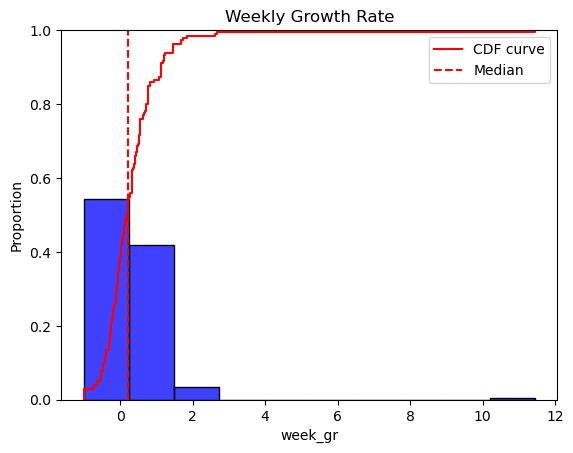

In [136]:
sns.histplot(eda['week_gr'],bins=10,color='b',stat='proportion')
sns.ecdfplot(eda['week_gr'],stat='proportion',color='r',label='CDF curve')
plt.axvline(eda['week_gr'].median(),linestyle='--',color='r',label='Median')
plt.legend()
plt.title('Weekly Growth Rate')

In [137]:
ml_df=master_df[['erp','policy_a','policy_b']]

In [138]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination='auto')
a = ml_df['policy_a'].values.reshape(-1, 1)
b = ml_df['policy_b'].values.reshape(-1, 1)
X = np.hstack((a, b))
iso.fit(X)

IsolationForest()

In [139]:
from sklearn.covariance import EllipticEnvelope
ee=EllipticEnvelope()
ee.fit(X)

EllipticEnvelope()

In [140]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(novelty=True)
lof.fit(X)

LocalOutlierFactor(novelty=True)

In [141]:
iso_out=iso.predict(X)
ee_out=ee.predict(X)
lof_out=lof.predict(X)
ml_df['iso']=iso_out
ml_df['ee']=ee_out
ml_df['lof']=lof_out

/tmp/ipykernel_8793/2858928191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['iso']=iso_out
/tmp/ipykernel_8793/2858928191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['ee']=ee_out
/tmp/ipykernel_8793/2858928191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [142]:
ml_df['iso']=ml_df['iso'].apply(lambda x: 'Outlier' if x==-1 else 'Inlier')
ml_df['ee']=ml_df['ee'].apply(lambda x: 'Outlier' if x==-1 else 'Inlier')
ml_df['lof']=ml_df['lof'].apply(lambda x: 'Outlier' if x==-1 else 'Inlier')

/tmp/ipykernel_8793/3790046004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['iso']=ml_df['iso'].apply(lambda x: 'Outlier' if x==-1 else 'Inlier')
/tmp/ipykernel_8793/3790046004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df['ee']=ml_df['ee'].apply(lambda x: 'Outlier' if x==-1 else 'Inlier')
/tmp/ipykernel_8793/3790046004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [143]:
ml_df

,erp,policy_a,policy_b,iso,ee,lof
0,28187,22.086050,29.170050,Inlier,Inlier,Inlier
1,29183,46.727498,47.283498,Outlier,Inlier,Inlier
2,29021,15.793566,19.043566,Inlier,Inlier,Inlier
3,28998,24.504896,27.754896,Inlier,Inlier,Inlier
4,29017,34.427100,39.011100,Inlier,Inlier,Inlier
...,...,...,...,...,...,...
193,19370,-12.155284,-12.155284,Outlier,Outlier,Outlier
194,29087,10.430290,25.986290,Outlier,Outlier,Inlier
195,28096,-12.155284,-12.155284,Outlier,Outlier,Outlier
196,29159,15.593205,26.705205,Inlier,Inlier,Inlier


/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Outlier Detection using Isolation Forest')

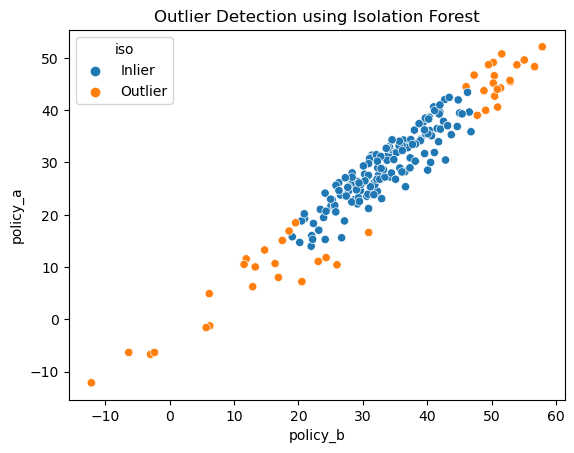

In [144]:
sns.scatterplot(data=ml_df,x='policy_b',y='policy_a',hue='iso',legend=True)
plt.title("Outlier Detection using Isolation Forest")

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Outlier Detection using Eliptic Envelope')

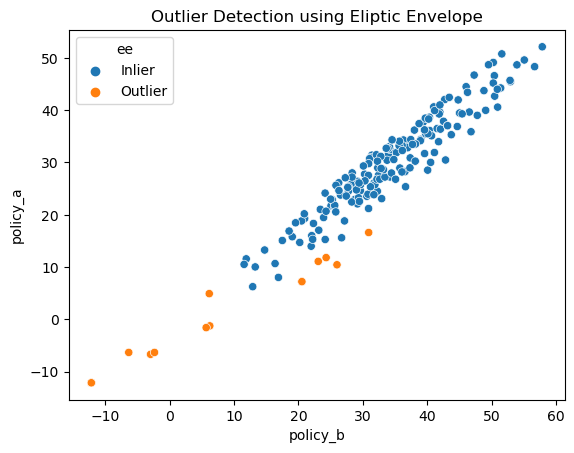

In [145]:
sns.scatterplot(data=ml_df,x='policy_b',y='policy_a',hue='ee',legend=True)
plt.title("Outlier Detection using Eliptic Envelope")

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Outlier detection using Local Outlier Factor')

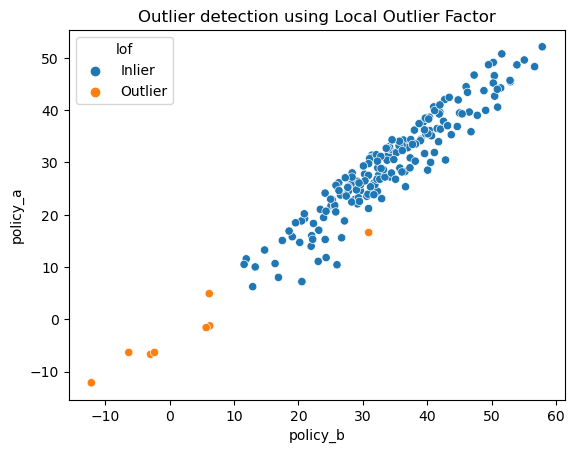

In [146]:
sns.scatterplot(data=ml_df,x='policy_b',y='policy_a',hue='lof',legend=True)
plt.title("Outlier detection using Local Outlier Factor")

In [147]:
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

In [148]:
x=np.array(master_df[['quizzes','policy_a','policy_b','gamejam']])
cluster=master_df[['quizzes','policy_a','policy_b','gamejam']]

In [149]:
eps=[i*0.5 for i in range(2,16)]

In [150]:
ss=[]
dbi=[]
chi=[]
for i in eps:
    dbscan=DBSCAN(eps=i,min_samples=4)
    dbscan.fit(x)
    ss.append(silhouette_score(x,dbscan.labels_))
    dbi.append(davies_bouldin_score(x,dbscan.labels_))
    chi.append(calinski_harabasz_score(x,dbscan.labels_))

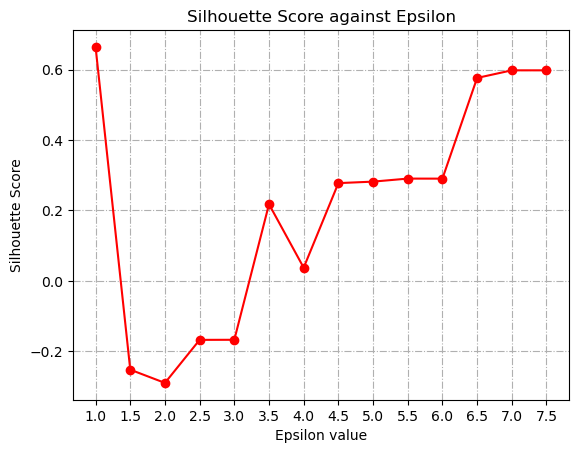

In [151]:
plt.plot(eps,ss,marker='o',color='r')
plt.xlabel('Epsilon value')
plt.xticks(eps)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score against Epsilon')
plt.grid(True,linestyle='-.')

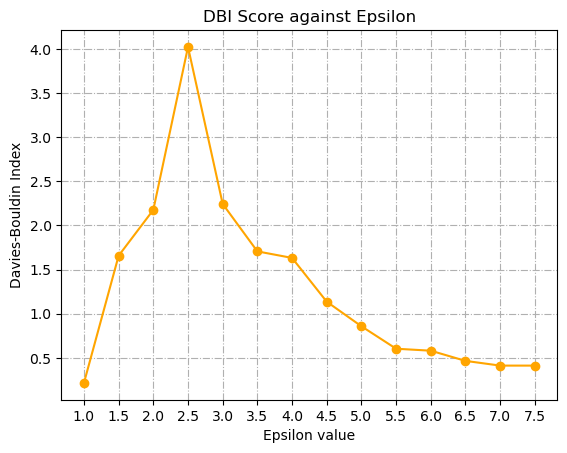

In [152]:
plt.plot(eps,dbi,marker='o',color='orange')
plt.xlabel('Epsilon value')
plt.xticks(eps)
plt.ylabel('Davies-Bouldin Index')
plt.title('DBI Score against Epsilon')
plt.grid(True,linestyle='-.')

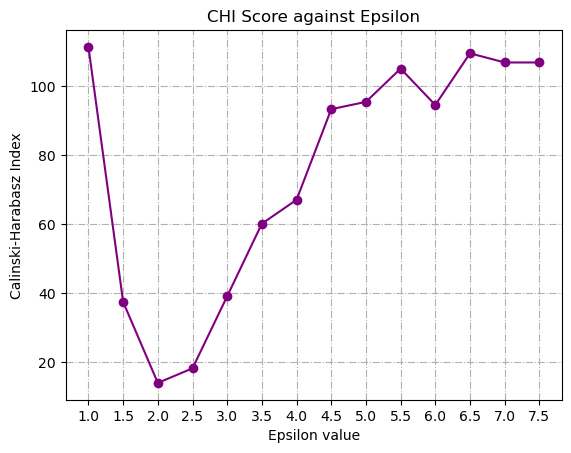

In [153]:
plt.plot(eps,chi,marker='o',color='purple')
plt.xticks(eps)
plt.xlabel('Epsilon value')
plt.ylabel('Calinski-Harabasz Index')
plt.title('CHI Score against Epsilon')
plt.grid(True,linestyle='-.')

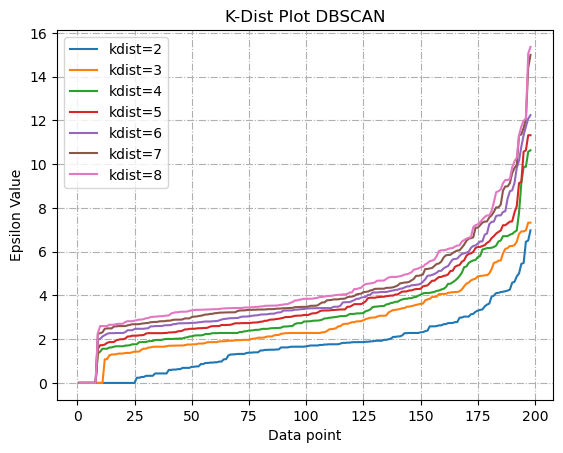

In [154]:
from sklearn.neighbors import NearestNeighbors
for k in range(2,9):
    nn=NearestNeighbors(n_neighbors=k,metric='euclidean')
    nn.fit(x)
    dist,indices=nn.kneighbors(x)
    kdist=dist[:,-1]
    kdist=np.sort(kdist)
    plt.plot(np.arange(1,len(kdist)+1),kdist,label=f'kdist={k}')

plt.xlabel("Data point")
plt.ylabel("Epsilon Value")
plt.title("K-Dist Plot DBSCAN")
plt.grid(True,linestyle='-.')
plt.legend()
plt.show()

In [155]:
dbscan=DBSCAN(eps=6.5,min_samples=4)
dbscan.fit(x)
cluster['dbscan']=dbscan.labels_

/tmp/ipykernel_8793/2577761175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['dbscan']=dbscan.labels_


In [156]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,n_jobs=-1,perplexity=5)
a=tsne.fit_transform(x)
cluster['y1']=a[:,0]
cluster['y2']=a[:,1]

/tmp/ipykernel_8793/1141264716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['y1']=a[:,0]
/tmp/ipykernel_8793/1141264716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['y2']=a[:,1]


/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='y1', ylabel='y2'>

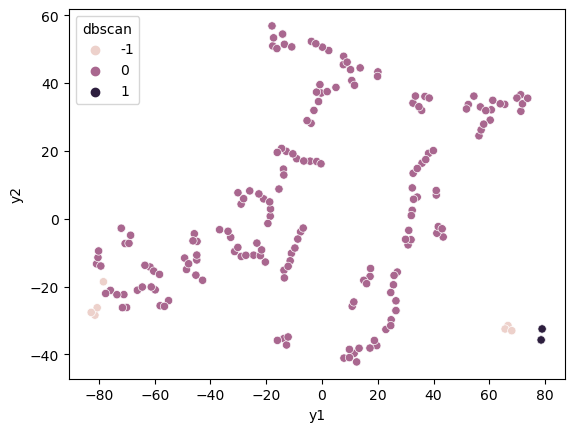

In [157]:
sns.scatterplot(data=cluster,x='y1',y='y2',hue='dbscan')

In [158]:
wcss=[]
ss=[]
dbi=[]
chi=[]
for i in range(2,12):
    km=KMeans(n_clusters=i,n_init='auto',algorithm='lloyd')
    km.fit(x)
    ss.append(silhouette_score(x,km.labels_))
    dbi.append(davies_bouldin_score(x,km.labels_))
    chi.append(calinski_harabasz_score(x,km.labels_))
    wcss.append(km.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc5052c5310>
Traceback (most recent call last):
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

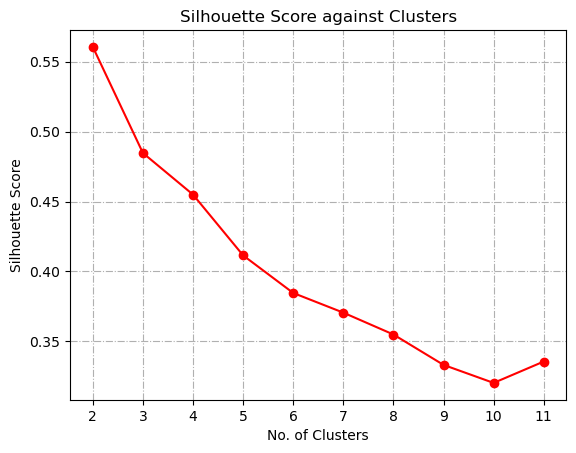

In [159]:
plt.plot(range(2,12),ss,marker='o',color='r')
plt.xlabel('No. of Clusters')
plt.xticks(range(2,12))
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score against Clusters')
plt.grid(True,linestyle='-.')

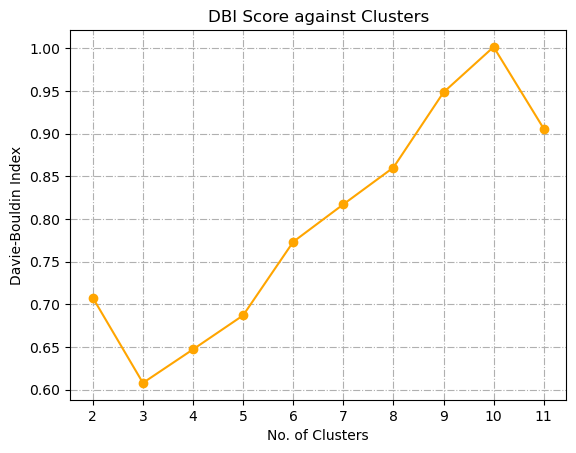

In [160]:
plt.plot(range(2,12),dbi,marker='o',color='orange')
plt.xlabel('No. of Clusters')
plt.xticks(range(2,12))
plt.ylabel('Davie-Bouldin Index')
plt.title('DBI Score against Clusters')
plt.grid(True,linestyle='-.')

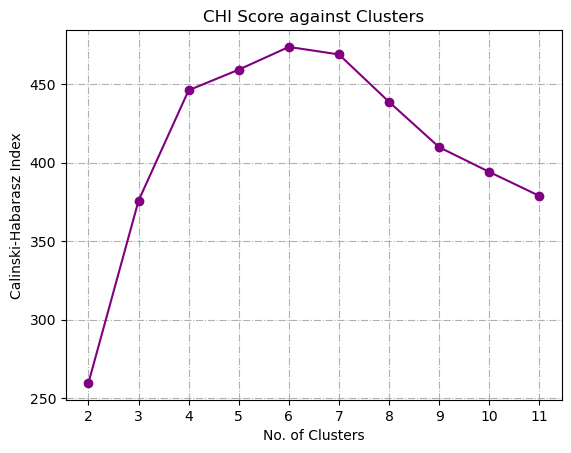

In [161]:
plt.plot(range(2,12),chi,marker='o',color='purple')
plt.xlabel('No. of Clusters')
plt.xticks(range(2,12))
plt.ylabel('Calinski-Habarasz Index')
plt.title('CHI Score against Clusters')
plt.grid(True,linestyle='-.')

In [162]:
km=KMeans(n_clusters=4,n_init='auto',algorithm='lloyd')
km.fit(x)
cluster['kmeans']=km.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc50af7d550>
Traceback (most recent call last):
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='y1', ylabel='y2'>

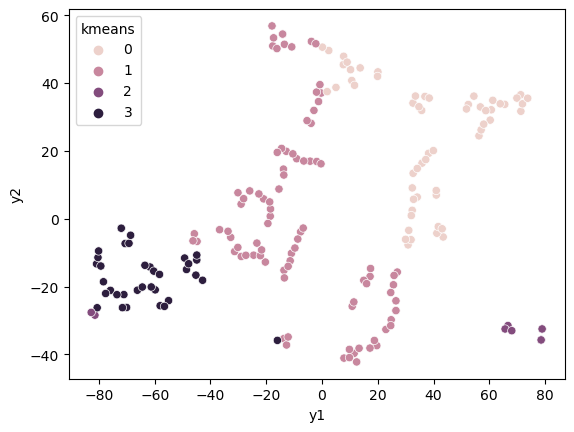

In [163]:
sns.scatterplot(data=cluster,x='y1',y='y2',hue='kmeans')

In [164]:
ss=[]
dbi=[]
chi=[]
for i in range(2,12):
    sc=SpectralClustering(n_clusters=i,affinity='laplacian')
    sc.fit(x)
    ss.append(silhouette_score(x,sc.labels_))
    dbi.append(davies_bouldin_score(x,sc.labels_))
    chi.append(calinski_harabasz_score(x,sc.labels_))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc50aea53a0>
Traceback (most recent call last):
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

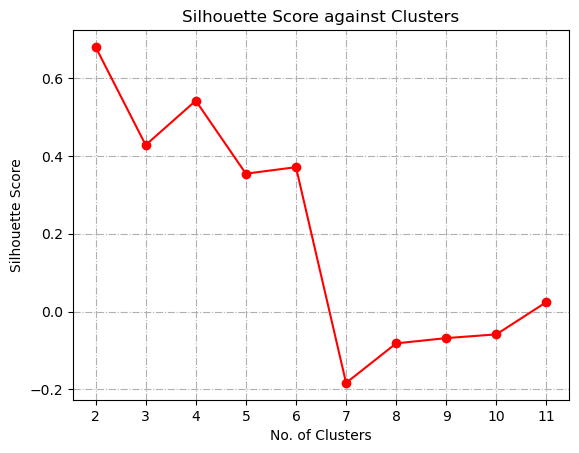

In [165]:
plt.plot(range(2,12),ss,marker='o',color='r')
plt.xlabel('No. of Clusters')
plt.xticks(range(2,12))
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score against Clusters')
plt.grid(True,linestyle='-.')

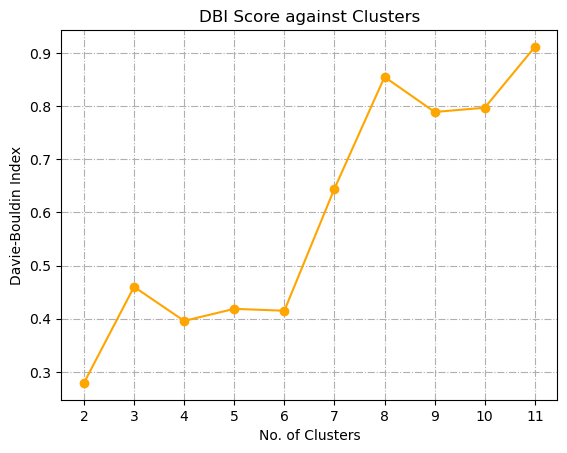

In [166]:
plt.plot(range(2,12),dbi,marker='o',color='orange')
plt.xlabel('No. of Clusters')
plt.xticks(range(2,12))
plt.ylabel('Davie-Bouldin Index')
plt.title('DBI Score against Clusters')
plt.grid(True,linestyle='-.')

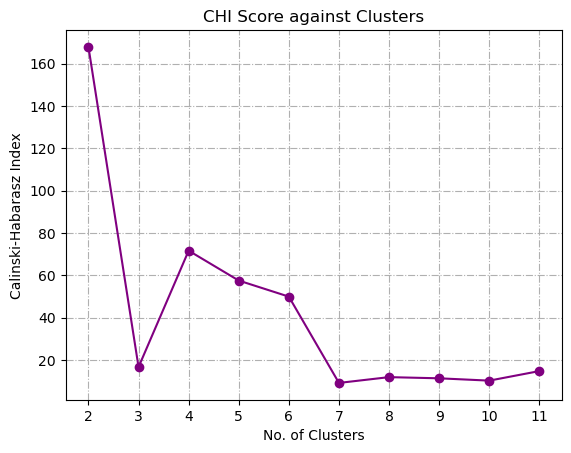

In [167]:
plt.plot(range(2,12),chi,marker='o',color='purple')
plt.xlabel('No. of Clusters')
plt.xticks(range(2,12))
plt.ylabel('Calinski-Habarasz Index')
plt.title('CHI Score against Clusters')
plt.grid(True,linestyle='-.')

In [168]:
sc=SpectralClustering(n_clusters=4,affinity='laplacian')
sc.fit(x)
cluster['spectral']=sc.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc50ad85700>
Traceback (most recent call last):
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/ibrahim/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ibrahim/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='y1', ylabel='y2'>

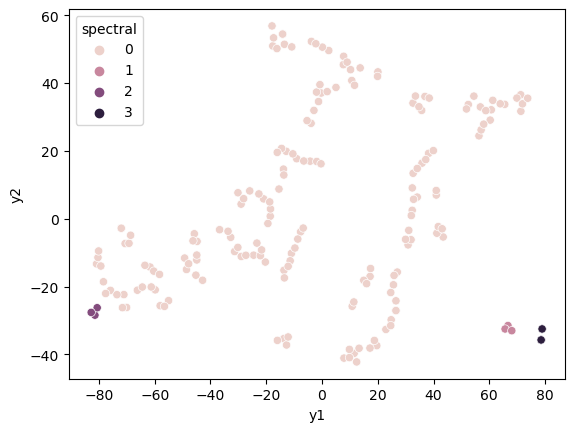

In [169]:
sns.scatterplot(data=cluster,x='y1',y='y2',hue='spectral')

In [170]:
#CLUSTERING IS NOT FEASIBLE FOR THIS DATASET